# Import libraries

In [67]:
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt

In [52]:
shapefile_folder = "/Users/Daniel/Desktop/MSc Data Science/Dissertaton Project/Repo/Vis-EHR/Shapefile"
shapefilename = "msoa-ref-England-Scotland2011.geojson"

shapefile = os.path.join(shapefile_folder, shapefilename)
uk_df = gpd.read_file(shapefile)

covid_data_folder = "/Users/Daniel/Desktop/MSc Data Science/Dissertaton Project/Repo/Vis-EHR/Data/Covid Cases data"
date_selected = "07-07-2021"
filename = "England_MSOA_Cases_2021-07-07.csv"

covid_data_path = os.path.join(covid_data_folder, date_selected, filename)
covid_data = pd.read_csv(covid_data_path, header=0)

# Shapefile plot

In [81]:
uk_df.plot()

AttributeError: 'GeoDataFrame' object has no attribute 'border'

In [54]:
covid_data.head()

,UtlaCode,UtlaName,LtlaCode,LtlaName,areaCode,areaName,date,newCasesBySpecimenDateRollingSum
0,E08000037,Gateshead,E08000037,Gateshead,E02001682,Ryton,07/07/2021,57
1,E08000037,Gateshead,E08000037,Gateshead,E02001683,Crawcrook & Greenside,07/07/2021,47
2,E08000037,Gateshead,E08000037,Gateshead,E02001684,"Pelaw, Felling Shore & Bill Quay",07/07/2021,67
3,E08000037,Gateshead,E08000037,Gateshead,E02001685,Blaydon South,07/07/2021,85
4,E08000037,Gateshead,E08000037,Gateshead,E02001686,Blaydon North & Winlaton Mill,07/07/2021,77


In [55]:
uk_df.head()

,code,geometry
0,E02000001,"POLYGON ((-0.09274 51.52139, -0.09453 51.52205..."
1,E02000002,"POLYGON ((0.14115 51.58054, 0.14180 51.58531, ..."
2,E02000003,"POLYGON ((0.14841 51.58075, 0.15105 51.58589, ..."
3,E02000004,"POLYGON ((0.19021 51.55268, 0.18475 51.55939, ..."
4,E02000005,"POLYGON ((0.15045 51.56561, 0.15441 51.56607, ..."


In [56]:
uk_df.rename(columns={"code":"areaCode"}, inplace=True) 

In [57]:
testdf = pd.merge(uk_df,
                  covid_data[["areaCode","areaName","newCasesBySpecimenDateRollingSum"]],
                  on="areaCode")
testdf.head()

,areaCode,geometry,areaName,newCasesBySpecimenDateRollingSum
0,E02000001,"POLYGON ((-0.09274 51.52139, -0.09453 51.52205...",City of London,39
1,E02000002,"POLYGON ((0.14115 51.58054, 0.14180 51.58531, ...",Marks Gate,11
2,E02000003,"POLYGON ((0.14841 51.58075, 0.15105 51.58589, ...",Chadwell Heath East,14
3,E02000004,"POLYGON ((0.19021 51.55268, 0.18475 51.55939, ...",Eastbrookend,14
4,E02000005,"POLYGON ((0.15045 51.56561, 0.15441 51.56607, ...",Becontree Heath,13


In [63]:
(testdf["newCasesBySpecimenDateRollingSum"] == 0).sum()

0

<AxesSubplot:>

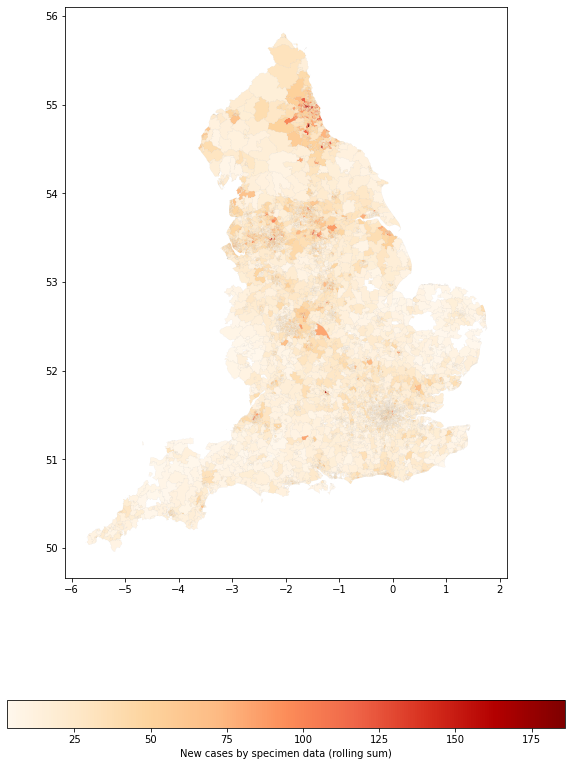

In [97]:
fig, axis = plt.subplots(1,1, figsize=(10,15))
testdf.plot(column="newCasesBySpecimenDateRollingSum",
            cmap="OrRd",
            figsize=(10, 15),
            ax = axis,
            edgecolor="black",
            linewidth=0.015,
            legend = True,
            legend_kwds={"label": "New cases by specimen data (rolling sum)",
                            "orientation": "horizontal"})
